1. $\textbf{Random Walk}$
The simple random walk is an extremely simple example of a random walk.

The first state is 0, then you jump from 0 to 1 with probability 0.5 and jump from 0 to -1 with probability 0.5.
Let $S_{n}$ to be state at time $n$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
start = 0
x = []
n = 10000
for i in range(n):
    step = np.random.choice([-1,1],p=[0.5,0.5])
    start = start + step
    x.append(start)

Text(0, 0.5, '$S_{n}$')

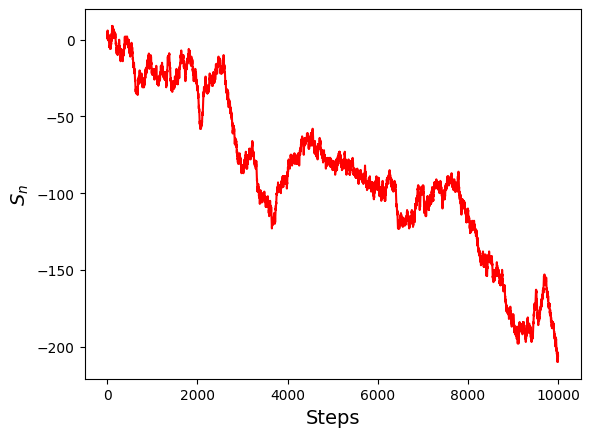

In [3]:
plt.plot(x, c ='red')
plt.xlabel('Steps',fontsize=14)
plt.ylabel('$S_{n}$',fontsize=14)

2. $\textbf{Biased Random Walk}$
In  biased random walk probability for left and right is not equal.

The first state is 0, then you jump from 0 to 1 with probability  for example 0.2 and jump from 0 to -1 with probability 0.8.
Let $S_{n}$ to be state at time $n$.

Text(0, 0.5, '$S_{n}$')

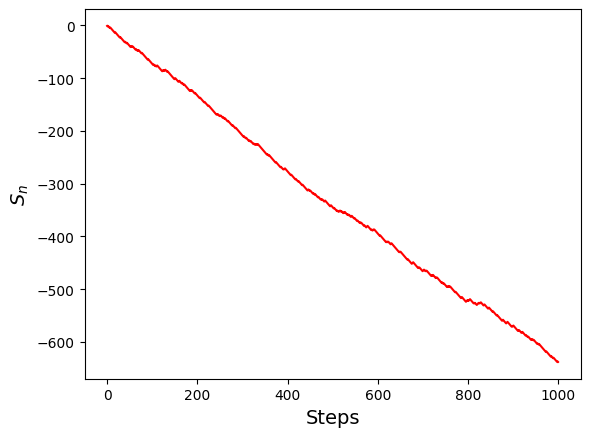

In [6]:
start = 0
biased_x = []
n = 1000
for i in range(n):
    step = np.random.choice([-1,1],p=[0.8,0.2])
    start = start + step
    biased_x.append(start)
plt.plot(biased_x, c ='red')
plt.xlabel('Steps',fontsize=14)
plt.ylabel('$S_{n}$',fontsize=14)

In [7]:
x = []
p = [[0.5,0.5],[0.9,0.1],[0.8,0.2],[0.6,0.4],[0.4,0.6],[0.2,0.8],[0.1,0.9]]
label_p = ['Simple',r'$p=0.9$',r'$p=0.8$',r'$p=0.6$',r'$p=0.4$',r'$p=0.2$',r'$p=0.1$']
n = 10
x = []
for couple in p:
    x_p = []
    start = 0
    for i in range(n):
        step = np.random.choice([-1,1],p=couple)
        start = start + step
        x_p.append(start)
    x.append(x_p)

x

[[-1, 0, -1, 0, 1, 2, 1, 0, -1, 0],
 [-1, -2, -3, -4, -5, -6, -7, -6, -7, -8],
 [1, 0, 1, 0, -1, -2, -3, -4, -5, -6],
 [-1, 0, 1, 2, 1, 0, 1, 2, 1, 2],
 [1, 2, 3, 4, 3, 4, 5, 6, 7, 6],
 [1, 0, 1, 2, 3, 4, 5, 4, 5, 4],
 [1, 2, 1, 2, 1, 2, 3, 4, 5, 6]]

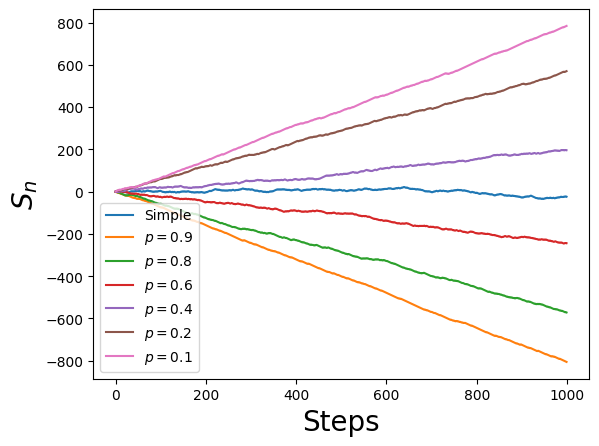

In [10]:
x = []
p = [[0.5,0.5],[0.9,0.1],[0.8,0.2],[0.6,0.4],[0.4,0.6],[0.2,0.8],[0.1,0.9]]
label_p = ['Simple',r'$p=0.9$',r'$p=0.8$',r'$p=0.6$',r'$p=0.4$',r'$p=0.2$',r'$p=0.1$']
n = 1000
x = []
for couple in p:
    x_p = []
    start = 0
    for i in range(n):
        step = np.random.choice([-1,1],p=couple)
        start = start + step
        x_p.append(start)
    x.append(x_p)
# For plot x that contains lists
i=0
for time_series in x:
    plt.plot(time_series, label = label_p[i])
    i=i+1
plt.xlabel('Steps',fontsize=20)
plt.ylabel(r'$S_{n}$',fontsize=20)
plt.legend()


3. $\textbf{Gambler’s Ruin Chain}$
Another simple way to extend the random walk is the gambler’s ruin chain.
Conceptually, it is very similar to the random walk: you start from a state $x$ and you can go to a state $x+1$ with probability $p$ or to a state $x-1$ with probability $1-p$
The interesting part is that when you arrive at $1$ or $N$ you are basically stuck. You can do nothing more than stay in that state forever.

Text(0, 0.5, 'Normalized Count')

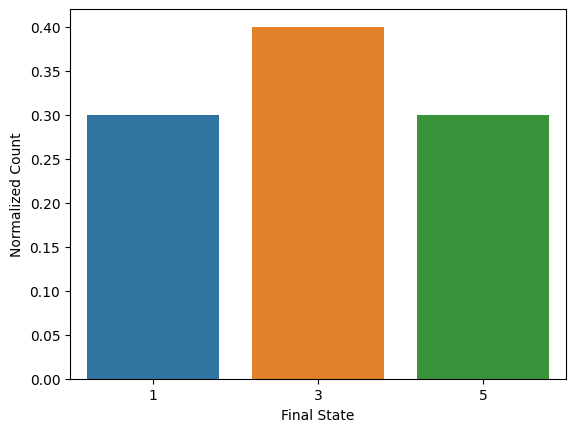

In [50]:
import pandas as pd
import seaborn as sns

def gamblersruinchain(start,first,last,n):
    for k in range(n):
        if start==first or start==last:
            start = start
        else:
            step = np.random.choice([-1,1],p=[0.5,0.5])
            start = start + step
    return start
    

state_list = []
m=10
for i in range(m):
    state_list.append(gamblersruinchain(3,0,5,2))
data_state = pd.DataFrame({'Final State':state_list})
data_occ = pd.DataFrame(data_state.value_counts('Final State')).rename(columns={0:'Count'})
data_occ['Count'] = data_occ['Count']/m
sns.barplot(x=data_occ.index,y=data_occ['Count'])
plt.ylabel('Normalized Count')


4. $\textbf{Markov Chain}$

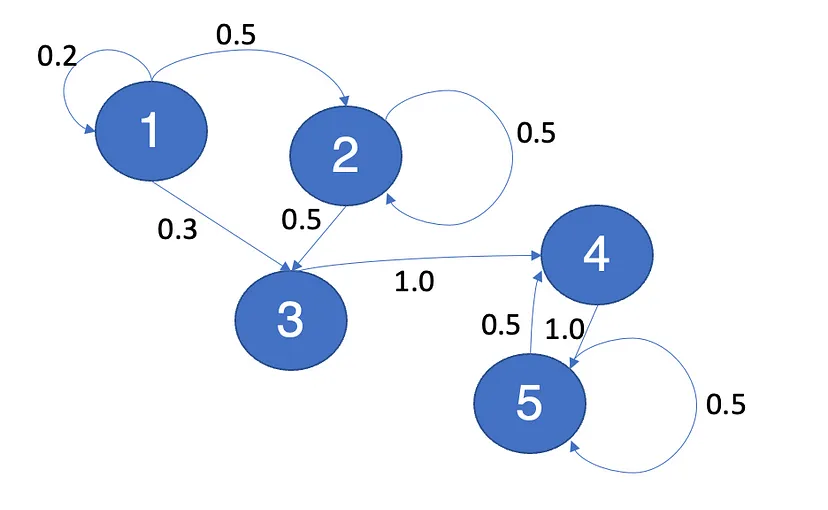

In [53]:
state_1 = [0.2,0.5,0.3,0,0]
state_2 = [0,0.5,0.5,0,0]
state_3 = [0,0,1,0,0]
state_4 = [0,0,0,0,1]
state_5 = [0,0,0,0.5,0.5]
trans_matrix = [state_1,state_2,state_3,state_4,state_5]
trans_matrix = np.array(trans_matrix)
trans_matrix

array([[0.2, 0.5, 0.3, 0. , 0. ],
       [0. , 0.5, 0.5, 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0.5, 0.5]])

In [59]:
from numpy.linalg import matrix_power
initial_dist = np.array([0.1, 0.2, 0.2, 0.3, 0.2])
N= 4
for n in range(1, N+1):
    (initial_dist @ (matrix_power(trans_matrix ,n) ))

[0.02 0.15 0.33 0.1  0.4 ]
[0.004 0.085 0.411 0.2   0.3  ]
[0.0008 0.0445 0.4547 0.15   0.35  ]
[1.6000e-04 2.2650e-02 4.7719e-01 1.7500e-01 3.2500e-01]
